In [1]:
from random import random
import numpy as np

In [44]:
N = 100
x=np.random.rand(N)
y=np.random.rand(N)

In [45]:
# x>y --> True
mask = np.array([x > 0.5*y for x,y in zip(x,y)])

In [46]:
def get_line_from_weight(w):
    p1 = [0, 1]
    p2 = [-w[2]/w[1], (-w[2]-w[0])/w[1]]
    return (p1, p2)

In [47]:
import matplotlib.pyplot as plt
import time
from IPython import display

def update_plot(x, y, w):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_ylim([0,1])
    ax1.set_xlim([0,1])

    ax1.scatter(x[mask], y[mask], s=30, c='b', marker='+')
    ax1.scatter(x[~mask],y[~mask], s=30, c='r', marker="+")

    p1, p2 = get_line_from_weight(w)
    ax1.plot(p1, p2, 'k', lw=2)

    plt.show()

In [48]:
def is_misclassified(x, y, m, w):
    return (np.inner(np.array([x, y, 1]), w) > 0) != m

def update_w(w, x1, x2, cl):
    return w + (1 if cl else -1)*np.array([x1, x2, 1])

In [49]:
w = np.array([10*random(), 10*random(), 10*random()])

converged=False

s = 0
missed = 0
cnt = 0
runs = 1000
max_iter = 100000

for l in range(runs):
    for i in range(max_iter):
        if converged==True:
            break

        converged=True
        
        for k in range(N):
            cnt = cnt + 1
            if is_misclassified(x[k], y[k], mask[k], w):
                missed = missed + 1
        
        for k in range(N):
            if is_misclassified(x[k], y[k], mask[k], w):
                w = update_w(w, x[k], y[k], mask[k])
                converged=False
    s = s + i
    w = np.array([10*random(), 10*random(), 10*random()])
    converged=False
    
print(s/1000)
print(missed/cnt)
print(cnt)

44.138
0.06279826906520458
4413800


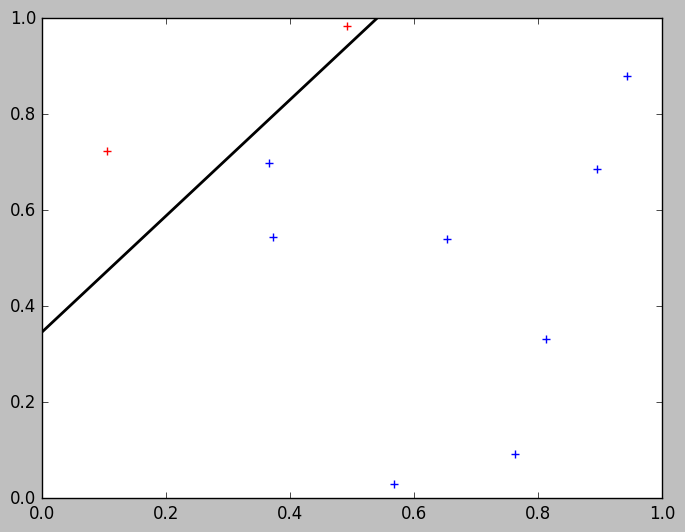

[ 5.02919163 -4.15659643  1.4404018 ]


In [19]:
w = np.array([10*random(), 10*random(), 10*random()])

converged=False

for i in range(1000):
    if converged==True:
        break
    
    display.clear_output(wait=True)
    update_plot(x, y, w)
    time.sleep(0.05)
    
    converged=True
    for k in range(N):
        if is_misclassified(x[k], y[k], mask[k], w):
            w = update_w(w, x[k], y[k], mask[k])
            converged=False
            
#             display.clear_output(wait=True)
#             update_plot(x, y, w)
#             time.sleep(1.0)
#             print(w)
#             break

print(w)